# Exploratory Data Analysis
HTS data - `ROS1_all data randomised.xlsx`

## Setup

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read data

In [23]:
df = pd.read_excel('../data/raw/ROS1_all data randomised.xlsx')
df.head()

,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,A01,1,1,12123,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,0.986831,0.075452,INACTIVE,Z score below 3,OK
1,A02,1,2,10507,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.909386,-0.543673,INACTIVE,Z score below 3,OK
2,A03,1,3,11176,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.124381,-0.287365,INACTIVE,Z score below 3,OK
3,A04,1,4,10564,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.842502,-0.521835,INACTIVE,Z score below 3,OK
4,A05,1,5,10408,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-1.025553,-0.581602,INACTIVE,Z score below 3,OK


## Data analysis

### Missing values and invalid entries

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WELL                                6688 non-null   object 
 1   row                                 6688 non-null   int64  
 2   column                              6688 non-null   int64  
 3   VALUE                               6688 non-null   int64  
 4   Well type                           6688 non-null   object 
 5   CONTROL OUTLIER                     0 non-null      float64
 6   CTRL NEG Mean(VALUE)                6688 non-null   float64
 7   CTRL NEG Standard deviation(VALUE)  6688 non-null   float64
 8   CTRL NEG Median(VALUE)              6688 non-null   float64
 9   CTRL POS Mean(VALUE)                6688 non-null   float64
 10  CTRL POS Standard deviation(VALUE)  6688 non-null   float64
 11  CTRL POS Median(VALUE)              6688 no

It can be seen that feature `CONTROL OUTLIER` has only NaNs, so it may be dropped.

In [25]:
del df['CONTROL OUTLIER']

According to dr. Jacek Kolanowski, values other than **OK** in the column `Transfer Status` should be excluded. Errors could be caused by problems with the machine or reagents.

In [43]:
df = df[df['Transfer Status'] == 'OK']

### Distributions
Examine how the `VALUE` is distributed.

count      6673.000000
mean      22069.847295
std       11043.148583
min        6419.000000
25%       12475.000000
50%       24368.000000
75%       26336.000000
max      167027.000000
Name: VALUE, dtype: float64


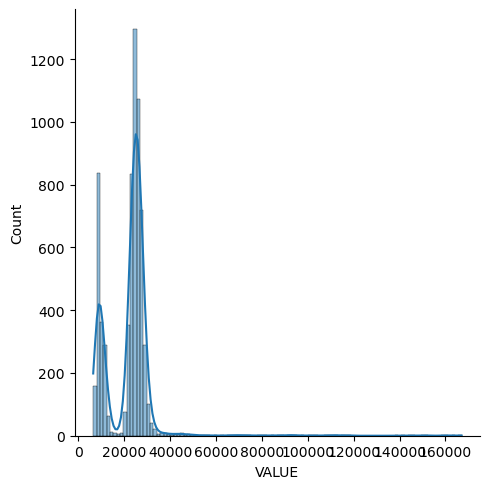

In [45]:
print(df['VALUE'].describe())
sns.displot(df['VALUE'], x=df['VALUE'], kde=True)

The `VALUE` values are distributed mostly around 22000 and 10000, with the long tail up to 160000.

Examine distributions of other numerical columns.

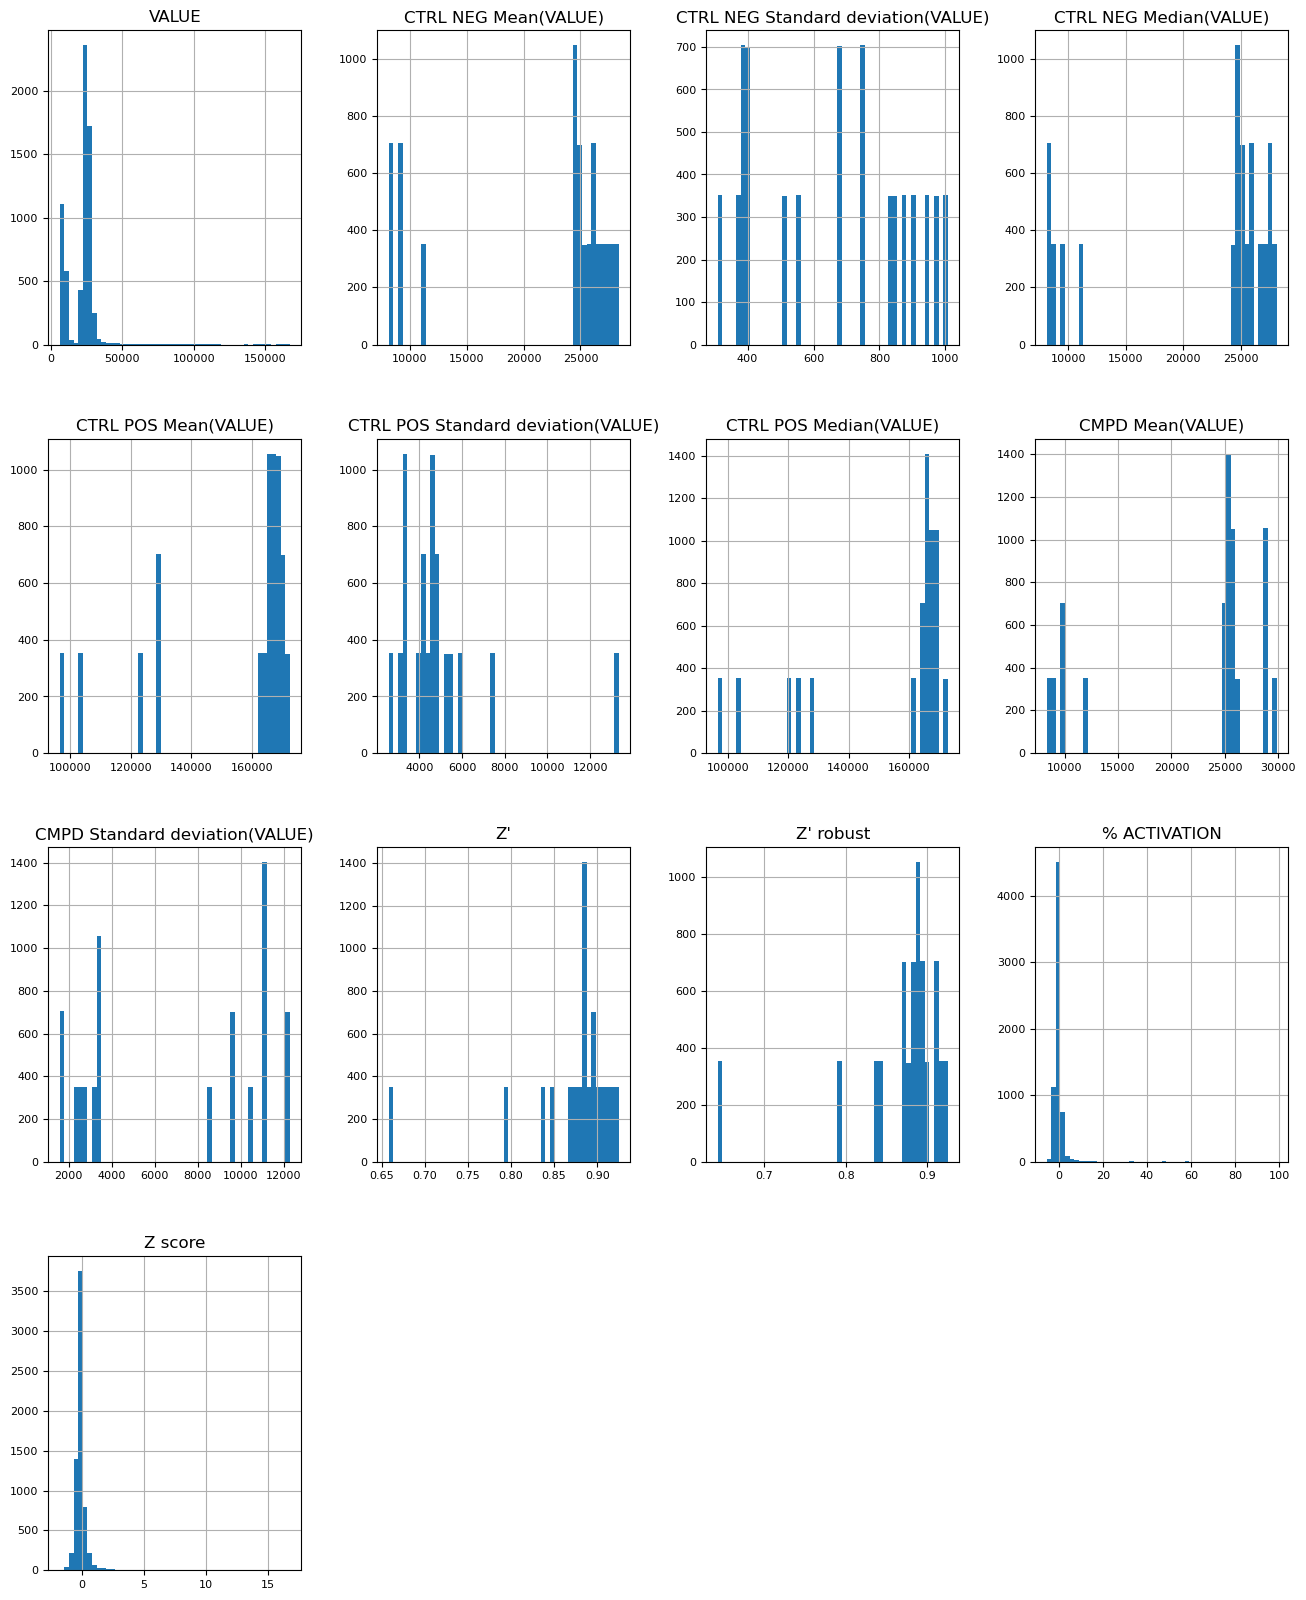

In [46]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
del df_num['row'], df_num['column']
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlations

In [51]:
df_num_corr = df_num.corr()['VALUE'].sort_values(ascending=False)
df_num_corr

VALUE                                 1.000000
% ACTIVATION                          0.727137
CMPD Mean(VALUE)                      0.684672
CTRL NEG Mean(VALUE)                  0.680973
CTRL NEG Median(VALUE)                0.680884
CTRL POS Median(VALUE)                0.629813
Z score                               0.626699
CTRL POS Mean(VALUE)                  0.624088
CTRL NEG Standard deviation(VALUE)    0.512413
CMPD Standard deviation(VALUE)        0.499216
Z'                                    0.493490
Z' robust                             0.483105
CTRL POS Standard deviation(VALUE)   -0.381870
Name: VALUE, dtype: float64

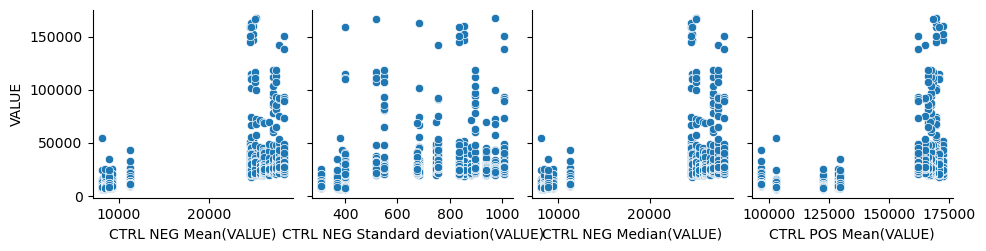

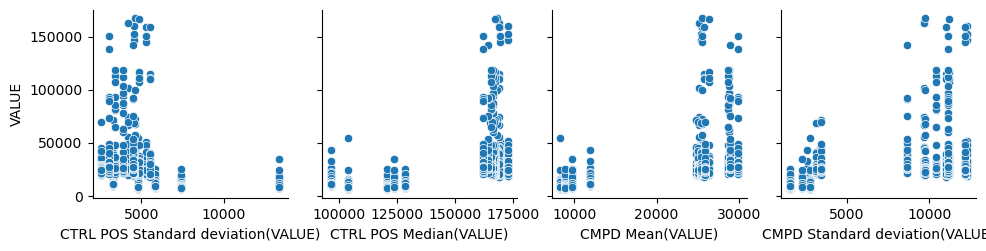

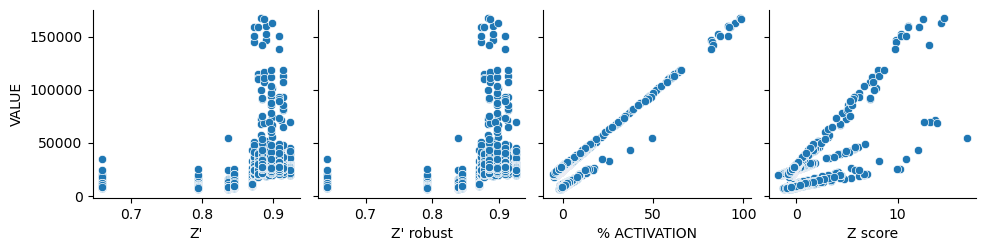

In [57]:
for i in range(1, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['VALUE'], diag_kind=None)

Feature to feature relationship

In [63]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient()

,row,column,VALUE,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),CTRL POS Standard deviation(VALUE),CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score
row,1.000000,-0.000310,0.015628,-0.000261,-0.000142,-0.000262,-0.000402,0.000048,-0.000389,-0.000261,-0.000449,-0.000176,-0.000170,0.022067,0.004398
column,-0.000310,1.000000,0.007258,0.001182,-0.000269,0.001190,0.001825,0.000117,0.001816,0.001333,0.002957,0.000603,0.000599,0.009939,0.013346
VALUE,0.015628,0.007258,1.000000,0.680973,0.512413,0.680884,0.624088,-0.381870,0.629813,0.684672,0.499216,0.493490,0.483105,0.727137,0.626699
CTRL NEG Mean(VALUE),-0.000261,0.001182,0.680973,1.000000,0.769525,0.999927,0.919142,-0.576131,0.928318,0.994607,0.668761,0.737359,0.722061,-0.004838,0.000021
CTRL NEG Standard deviation(VALUE),-0.000142,-0.000269,0.512413,0.769525,1.000000,0.764775,0.693056,-0.510044,0.705957,0.748527,0.459118,0.579322,0.568624,-0.019223,-0.000058
CTRL NEG Median(VALUE),-0.000262,0.001190,0.680884,0.999927,0.764775,1.000000,0.919199,-0.578551,0.928495,0.994475,0.667775,0.740270,0.725010,-0.004900,0.000022
CTRL POS Mean(VALUE),-0.000402,0.001825,0.624088,0.919142,0.693056,0.919199,1.000000,-0.325578,0.998567,0.911516,0.665069,0.551313,0.534771,-0.010066,0.000024
CTRL POS Standard deviation(VALUE),0.000048,0.000117,-0.381870,-0.576131,-0.510044,-0.578551,-0.325578,1.000000,-0.370525,-0.557794,-0.285162,-0.963570,-0.967364,0.013850,0.000021
CTRL POS Median(VALUE),-0.000389,0.001816,0.629813,0.928318,0.705957,0.928495,0.998567,-0.370525,1.000000,0.919882,0.669684,0.590839,0.575139,-0.010723,0.000021
CMPD Mean(VALUE),-0.000261,0.001333,0.684672,0.994607,0.748527,0.994475,0.911516,-0.557794,0.919882,1.000000,0.729098,0.720801,0.705634,0.005389,0.000027
